In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
df = pd.read_excel('/content/insurance.xlsx')

In [ ]:
df.head()

,idade,sexo,imc,quantidade_filhos,fumante,regiao,custos_seguro
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.560,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   idade              1341 non-null   int64  
 1   sexo               1338 non-null   object 
 2   imc                1341 non-null   float64
 3   quantidade_filhos  1341 non-null   int64  
 4   fumante            1341 non-null   object 
 5   regiao             1341 non-null   object 
 6   custos_seguro      1341 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.5+ KB


In [ ]:
df.describe(
)

,idade,imc,quantidade_filhos,custos_seguro
count,1341.000000,1341.000000,1341.000000,1341.000000
mean,39.186428,30.684903,1.092468,13240.734520
std,14.040969,6.107806,1.205254,12112.696927
min,18.000000,15.960000,0.000000,0.000000
25%,27.000000,26.315000,0.000000,4719.524050
50%,39.000000,30.400000,1.000000,9361.326800
75%,51.000000,34.770000,2.000000,16586.497710
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.isnull().sum()

idade                0
sexo                 3
imc                  0
quantidade_filhos    0
fumante              0
regiao               0
custos_seguro        0
dtype: int64

In [ ]:
df.dropna(inplace = True)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le= LabelEncoder()

In [ ]:
df['sexo'] = le.fit_transform(df['sexo'])
df['regiao'] = le.fit_transform(df['regiao'])
df['fumante'] = le.fit_transform(df['fumante'])

In [ ]:
formula = 'custos_seguro ~ idade + imc + quantidade_filhos + fumante + regiao'

In [ ]:
df.corr()

,idade,sexo,imc,quantidade_filhos,fumante,regiao,custos_seguro
idade,1.000000,-0.020856,0.109214,0.042469,-0.025019,0.002127,0.299008
sexo,-0.020856,1.000000,0.046438,0.017163,0.076185,0.004588,0.057292
imc,0.109214,0.046438,1.000000,0.012867,0.003715,0.157591,0.198285
quantidade_filhos,0.042469,0.017163,0.012867,1.000000,0.007673,0.016569,0.067998
fumante,-0.025019,0.076185,0.003715,0.007673,1.000000,-0.002181,0.787251
regiao,0.002127,0.004588,0.157591,0.016569,-0.002181,1.000000,-0.006208
custos_seguro,0.299008,0.057292,0.198285,0.067998,0.787251,-0.006208,1.000000


<Axes: >

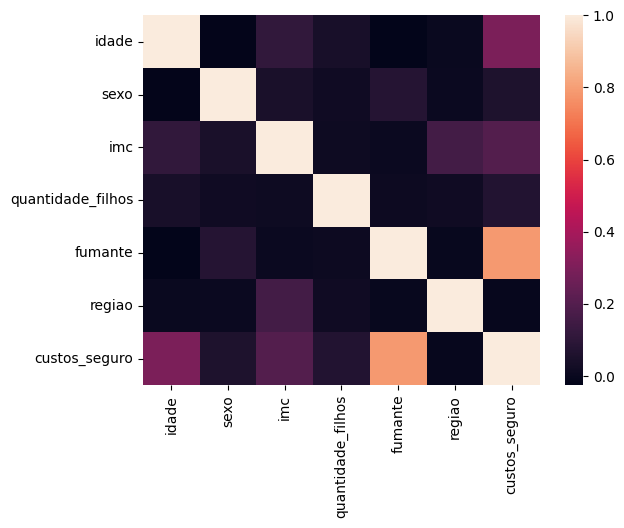

In [ ]:
sns.heatmap(df.corr())

In [ ]:
from statsmodels.regression.linear_model import OLS

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
modelo = smf.ols(formula=formula,data=df).fit()

In [ ]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:          custos_seguro   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     802.2
Date:                Sun, 14 Jul 2024   Prob (F-statistic):               0.00
Time:                        00:59:59   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1332   BIC:                         2.714e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -1.187e+04    945.88

In [ ]:
x = df.drop('custos_seguro',axis=1)
y = df['custos_seguro']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(x_train,y_train)

LinearRegression()

In [ ]:
pred = lm.predict(x_test)

In [ ]:
mse_lm = mean_squared_error(y_test,pred)

In [ ]:
mae_lm = mean_absolute_error(y_test,pred)

In [ ]:
r2_lm = lm.score(x_train,y_train)

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
pred_rf =rf.predict(x_test)

In [ ]:
mse_rf = mean_squared_error(y_test,pred_rf)

In [ ]:
msa_rf = mean_absolute_error(y_test,pred_rf)

In [ ]:
r2_rf = rf.score(x_test,y_test)

In [ ]:
print('MSE Linear Regression:',mse_lm)
print('MSE Random Forest:',mse_rf)
print('MAE Linear Regression:',mae_lm)
print('MAE Random Forest:',msa_rf)
print('R2 Linear Regression:',r2_lm)
print('R2 Random Forest:',r2_rf)

MSE Linear Regression: 33634997.15125164
MSE Random Forest: 21187709.308463566
MAE Linear Regression: 4186.326508564764
MAE Random Forest: 2498.045845379199
R2 Linear Regression: 0.7416983792034761
R2 Random Forest: 0.8635241067358654
